In [152]:
from sympy import *
init_printing()

# Бомбометание без сопротивления воздуха

Пусть бомба отделяется от самолета, летящего горизонтально со скоростью $V$ на выстоте $H$. Вывести уравнение движения бомбы. Сопротивлением воздуха пренебречь.

Через какое время T упадет бомба? На каком расстоянии S от места выпуска?

Принять $g = 9.81 м/c^2$

![](http://adminland.ru/crimea/books/sh_hb/pict/r33.gif)

Нарисовать траекторию падения бомбы, сброшенной на высоте 1000 м со скоростью 30 м/с.

Если пренебречь сопротивлением воздуха (силой трения), то на бомбу массой m действует только сила тяжести, направленная вертикально вниз.

t - время в секундах - независимая переменная.

x(t) и y(t) - функции координаты бомбы от времени.

Скорость бомбы $$\vec{v} = \vec{v_x} + \vec{v_y}$$

Скорость - это производная изменения координат:

$$v_x = x'(t) \\ v_y = y'(t)$$

Ускорение - это производная скорости. Силы с горизонтальной составляющей нет, вертикально действует сила тяжести, направлена вертикально вниз.

$$0 = mx''(t) \\ -mg = my''(t)$$

Масса бомбы сократится. Получим систему дифференциальных уравнений
$$0 = x''(t) \\ -g = y''(t)$$

Граничные условия решения этой системы определяем из начального (t=0) положения:

* Бомба отделяется от самолета, летящего горизонтально со скоростью $V$ $$x'(0) = V \\ y'(0) = 0$$
* Самолет при этом находится на высоте $H$ при x=0. $$x(0) = 0 \\ y(0) = H$$


In [153]:
# Определим константы. Пока это символы
V = symbols('V', positive=True)    # скорость самолета
H = symbols('H', positive=True)    # высота самолета
g = symbols('g', positive=True)    # ускорение свободного падения
g_terra = 9.81

In [154]:
# определим независимую переменную и искомые фукнции
t = symbols('t', positive=True)
x = Function('x')(t)
y = Function('y')(t)

Запишем полученные дифференциальные уравнения. Заметим, что они не зависят друг от друга. Значит, это не система и решать их можно отдельно.

Решим уравнение по оси Х: $x''(t) = 0$ при $x(0) = 0$ и $x'(0) = V$

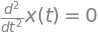

In [155]:
eq1 = Eq(diff(x, t, 2), 0)
eq1

In [156]:
xdsol = dsolve(eq1)
xdsol

Запишем праву часть в виде выражения xfunc

In [157]:
xfunc = xdsol.rhs
xfunc

Ее производную обозначим dx

In [158]:
dx = xfunc.diff(t)
dx

Запишем граничные условия. Они образуют систему уравнений.

In [177]:
xconst_sys = [Eq(xfunc.subs({t:0}), 0), Eq(dx.subs({t:0}), V)]
xconst_sys

Мы уже видим решение, но формально это все еще система уравнений, которую нужно решать. Решим ее и получим подстановки для $C_1$ и $C_2$

In [178]:
xconst = solve(xconst_sys)  # это обычное уравнение, поэтому solve
xconst

Подставим найденные константы в xfunc

In [179]:
xsol = xfunc.subs(xconst)
xsol

Аналогично решим дифференциальное уравнение по y $y''(t) = -g$ при $y(0) = H$ и $y'(0) = 0$ 

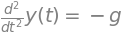

In [180]:
eq2 = Eq(diff(y, t, 2), -g)
eq2

In [181]:
ydsol = dsolve(eq2)
ydsol

Заметим, что это совершенно другие константы, чем в уравнении по х. Хотя программа их назвала так же: $C_1$ и $C_2$

In [182]:
yfunc = ydsol.rhs
yfunc

In [183]:
dy = diff(yfunc, t)   # тут обязательно нужно сказать, что берем производную
dy

In [184]:
yconst_sys = [Eq(yfunc.subs({t:0}), H), Eq(dy.subs({t:0}), 0)]
yconst_sys

In [185]:
yconst = solve(yconst_sys)  # это обычное уравнение, поэтому solve
yconst

In [186]:
ysol = yfunc.subs(yconst)
ysol

Мы нашли функции x(t) и y(t)

In [187]:
xsol   # x(t)

In [188]:
ysol  # y(t)

Ответим на впрос "Через какое время Т упадет бомба?"

Бомба упадет, значит $y(T)=0$. Найдем из этого условия время.

In [189]:
T = solve(ysol, t)
T

Если мы получили отрицательный ответ $\displaystyle \left[ - \sqrt{2} \sqrt{\frac{H}{g}}, \  \sqrt{2} \sqrt{\frac{H}{g}}\right]$, то мы не написали правильные предположения о символах.
Надо дописать, что `postitive=True` (посмотрите на `symbols` где мы определяли t). Все еще есть отрицательный ответ? sympy ничего не знает о H и g - вдруг это мнимые числа. Допишите предположения и для них.

In [190]:
L = xsol.subs({t:T[0]}) # на каком расстоянии упала бомба
L

Откопируем ответ (вывод для нашей маленькой научной работы)

Ответ: бомба упадет через $\sqrt{{2H}/{g}}$ секунд в  $\sqrt{{2H}/{g}}V$ метрах от места выпуска.

Подставим численные значения H=1000, V=30, g=9.81

In [191]:
Hn = 1000
Vn = 30
gn = 9.81

num_subs = {H:Hn, V:Vn, g:gn}

Tplot = T[0].subs(num_subs).n()
Tplot

In [192]:
xn = xsol.subs(num_subs)
xn

In [193]:
yn = ysol.subs(num_subs)
yn

In [195]:
Ln = xn.subs({t:Tplot})
Ln

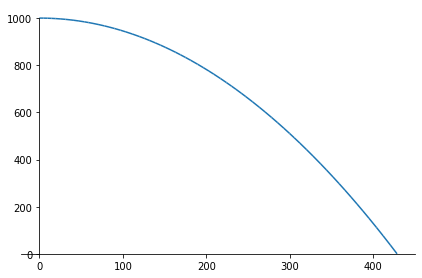

In [194]:
plot_parametric(xn, yn, (t, 0, Tplot))